<a href="https://colab.research.google.com/github/likaiwen1128/colab/blob/master/kmeans_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from numpy.random import randint
from math import sqrt
from vega_datasets import data

## Assignment
The following lines of code create data points in 4 clusters or 'blobs'. 



In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, which_blob = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)

Your assignment is to create a k-means clustering algorithm from scratch producing a sequence of images representing the process in progress. 

Some constraints:
* Don't copy something off the web.
* Use `pandas` to store the data
* Use `altair` to make the graphs

It's good for your soul to figure stuff out on your own.  And with friends.  And with new friends at Stack Overflow.

## A k-means clustering algorithm

1. Randomly assign the blob points to groups.

2. Calculate the centroids of those groups.
3. Assign blob points to groups based on which centroid is closest.

Repeat Steps 2 and 3 until ... the centroids stop moving very much.  For this assignment, you can determine this visually.  If you are ambitious, you could measure the movement of the centroids and stop when it is lower than a set level.

## Hints, advice

*   Your first order of business is to explore the output of `make_blobs`.  'type()' and `.shape` can be useful.
*   I found the dataframe method `groupby`helpful, particularly once you understand what its output is.
* You are probably going to want to make some functions that operate on columns of your dataframe.  Define an ordinary function and then use `np.vectorize` to make it apply to vectors/columns/arrays.
* The notebook is an interesting environment in which to code.  You can conduct experiments to see how things work and then use text cells to document what you found. 
* I found it awkward to have a loop produce a sequence of Altair charts.  I've made some progress on figuring this out (ie name your charts and use `display()`), but I'm not all the way there.

Good luck.



In [0]:
import pandas as pd
import altair as alt
import numpy as np


In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, which_blob = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)

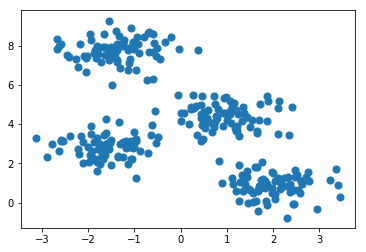

In [0]:
plt.scatter(X[:,0],X[:,1],s=50);

In [0]:
print(X.shape)

(300, 2)


In [0]:
type(X)

numpy.ndarray

In [0]:
X[0:10]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207],
       [ 3.43761754,  0.26165417],
       [-1.80822253,  1.59701749],
       [ 1.41372442,  4.38117707],
       [-0.20493217,  8.43209665],
       [-0.71109961,  8.66043846]])

In [0]:
blobs=pd.DataFrame()
blobs['x']=X[:,0]
blobs['y']=X[:,1]
blobs['blobgroup']=which_blob
blobs.head()

,x,y,blobgroup
0,0.836857,2.136359,1
1,-1.413658,7.409623,3
2,1.155213,5.099619,0
3,-1.018616,7.814915,3
4,1.271351,1.892542,1


In [0]:
blobgroupre=np.random.randint(4, size=300)
blobs['blobgroupre']=blobgroupre
blobs.head()

,x,y,blobgroup,blobgroupre
0,0.836857,2.136359,1,3
1,-1.413658,7.409623,3,2
2,1.155213,5.099619,0,2
3,-1.018616,7.814915,3,1
4,1.271351,1.892542,1,1


In [0]:
blobgp2=blobs.groupby(['blobgroupre'])['x','y'].mean()
blobgp2


,x,y
blobgroupre,,
0,-0.345799,4.230298
1,0.161577,3.490196
2,0.157983,4.033334
3,-0.038009,4.146543


In [0]:
blobgp=blobs.groupby(['blobgroup'])['x','y'].mean()
blobgp

,x,y
blobgroup,,
0,0.949735,4.419069
1,1.982583,0.867713
2,-1.584385,2.830813
3,-1.373244,7.753689


In [0]:
type(blobgp)

pandas.core.frame.DataFrame

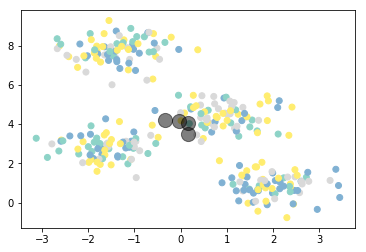

In [0]:
# c1=alt.Chart(blobs,height=150).mark_circle(opacity=0.6).encode(
#   x='x',
#   y='y',
#   color=alt.Color('blobgroupre',scale=alt.Scale(type='linear',range=['blue','orange']))
    
# ).interactive()

plt.scatter(blobs.iloc[:,0],blobs.iloc[:,1],c=blobs.iloc[:,3],cmap='Set3')
c2=plt.scatter(blobgp2.iloc[:,0],blobgp2.iloc[:,1],c='black',s=200,alpha=0.5)

In [0]:
color='blobgroup'

In [0]:
np.mean(blobs.x)


-0.006327628450079412

In [0]:
def ds(a,b,c,d):
  return((a-b)**2+(c-d)**2)**0.5

In [0]:
ds=np.vectorize(ds)

In [0]:
blobs['ds1']=ds(blobs.x,blobgp2.iloc[0][0],blobs.y,blobgp2.iloc[0][1])
blobs['ds2']=ds(blobs.x,blobgp2.iloc[1][0],blobs.y,blobgp2.iloc[1][1])
blobs['ds3']=ds(blobs.x,blobgp2.iloc[2][0],blobs.y,blobgp2.iloc[2][1])
blobs['ds4']=ds(blobs.x,blobgp2.iloc[3][0],blobs.y,blobgp2.iloc[3][1])
blobs.head(10)

,x,y,blobgroup,blobgroupre,ds1,ds2,ds3,ds4
0,0.836857,2.136359,1,3,2.404840,1.512904,2.014791,2.192311
1,-1.413658,7.409623,3,2,3.353868,4.224130,3.724162,3.541201
2,1.155213,5.099619,0,2,1.734577,1.891442,1.459942,1.527132
3,-1.018616,7.814915,3,1,3.647213,4.482861,3.960396,3.797175
4,1.271351,1.892542,1,1,2.842583,1.945276,2.413003,2.606711
5,3.437618,0.261654,1,1,5.483099,4.599557,4.998157,5.212709
6,-1.808223,1.597017,2,3,3.012117,2.732075,3.130751,3.103826
7,1.413724,4.381177,0,0,1.765980,1.536789,1.303028,1.470572
8,-0.204932,8.432097,3,3,4.204159,4.955472,4.413708,4.288803
9,-0.711100,8.660438,3,1,4.445176,5.243374,4.708014,4.563804


In [0]:
def assign(x,y):
  disc=[]
  for i in range (4):
    disc1=ds(x,blobgp2.iloc[i][0],y,blobgp2.iloc[i][1])
    disc.append(disc1)
    disc.index(min(disc))
  return disc.index(min(disc))

In [0]:
assign=np.vectorize(assign)

In [0]:
blobs['blobgroupre']=assign(blobs.x,blobs.y)
blobs.head()

,x,y,blobgroup,blobgroupre,ds1,ds2,ds3,ds4
0,0.836857,2.136359,1,1,2.404840,1.512904,2.014791,2.192311
1,-1.413658,7.409623,3,0,3.353868,4.224130,3.724162,3.541201
2,1.155213,5.099619,0,2,1.734577,1.891442,1.459942,1.527132
3,-1.018616,7.814915,3,0,3.647213,4.482861,3.960396,3.797175
4,1.271351,1.892542,1,1,2.842583,1.945276,2.413003,2.606711


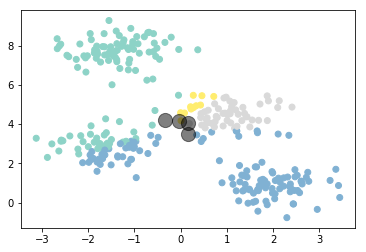

In [0]:
plt.scatter(blobs.iloc[:,0],blobs.iloc[:,1],c=blobs.iloc[:,3],cmap='Set3')
plt.scatter(blobgp2.iloc[:,0],blobgp2.iloc[:,1],c='black',s=200,alpha=0.5)

In [0]:
blobgp2=blobs.groupby(['blobgroupre'])['x','y'].mean()
blobgp2
blobs['blobgroupre']=assign(blobs.x,blobs.y)
blobs.head()

,x,y,blobgroup,blobgroupre,ds1,ds2,ds3,ds4
0,0.836857,2.136359,1,1,2.404840,1.512904,2.014791,2.192311
1,-1.413658,7.409623,3,0,3.353868,4.224130,3.724162,3.541201
2,1.155213,5.099619,0,2,1.734577,1.891442,1.459942,1.527132
3,-1.018616,7.814915,3,0,3.647213,4.482861,3.960396,3.797175
4,1.271351,1.892542,1,1,2.842583,1.945276,2.413003,2.606711


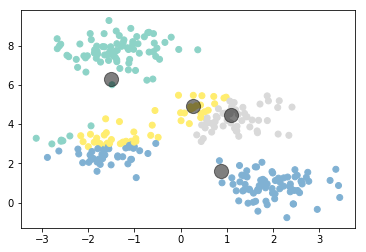

In [0]:
plt.scatter(blobs.iloc[:,0],blobs.iloc[:,1],c=blobs.iloc[:,3],cmap='Set3')
plt.scatter(blobgp2.iloc[:,0],blobgp2.iloc[:,1],c='black',s=200,alpha=0.5)

In [0]:
blobgp2=blobs.groupby(['blobgroupre'])['x','y'].mean()
blobgp2

,x,y
blobgroupre,,
0,-1.474948,7.372951
1,0.742617,1.425381
2,1.185210,4.244672
3,-0.647865,3.983496


In [0]:
blobs['blobgroupre']=assign(blobs.x,blobs.y)
blobs.head()

,x,y,blobgroup,blobgroupre,ds1,ds2,ds3,ds4
0,0.836857,2.136359,1,1,2.404840,1.512904,2.014791,2.192311
1,-1.413658,7.409623,3,0,3.353868,4.224130,3.724162,3.541201
2,1.155213,5.099619,0,2,1.734577,1.891442,1.459942,1.527132
3,-1.018616,7.814915,3,0,3.647213,4.482861,3.960396,3.797175
4,1.271351,1.892542,1,1,2.842583,1.945276,2.413003,2.606711


In [0]:
blobgp2=blobs.groupby(['blobgroupre'])['x','y'].mean()
blobgp2

blobs['blobgroupre']=assign(blobs.x,blobs.y)
blobs.head()

,x,y,blobgroup,blobgroupre,ds1,ds2,ds3,ds4
0,0.836857,2.136359,1,1,2.404840,1.512904,2.014791,2.192311
1,-1.413658,7.409623,3,0,3.353868,4.224130,3.724162,3.541201
2,1.155213,5.099619,0,2,1.734577,1.891442,1.459942,1.527132
3,-1.018616,7.814915,3,0,3.647213,4.482861,3.960396,3.797175
4,1.271351,1.892542,1,1,2.842583,1.945276,2.413003,2.606711


In [0]:
blobgp2=blobs.groupby(['blobgroupre'])['x','y'].mean()
blobgp2
blobs['blobgroupre']=assign(blobs.x,blobs.y)
blobs.head()

,x,y,blobgroup,blobgroupre,ds1,ds2,ds3,ds4
0,0.836857,2.136359,1,1,2.404840,1.512904,2.014791,2.192311
1,-1.413658,7.409623,3,0,3.353868,4.224130,3.724162,3.541201
2,1.155213,5.099619,0,2,1.734577,1.891442,1.459942,1.527132
3,-1.018616,7.814915,3,0,3.647213,4.482861,3.960396,3.797175
4,1.271351,1.892542,1,1,2.842583,1.945276,2.413003,2.606711


In [0]:
blobgp2=blobs.groupby(['blobgroupre'])['x','y'].mean()
blobgp2
blobs['blobgroupre']=assign(blobs.x,blobs.y)
blobs.head()

,x,y,blobgroup,blobgroupre,ds1,ds2,ds3,ds4
0,0.836857,2.136359,1,1,2.404840,1.512904,2.014791,2.192311
1,-1.413658,7.409623,3,0,3.353868,4.224130,3.724162,3.541201
2,1.155213,5.099619,0,2,1.734577,1.891442,1.459942,1.527132
3,-1.018616,7.814915,3,0,3.647213,4.482861,3.960396,3.797175
4,1.271351,1.892542,1,1,2.842583,1.945276,2.413003,2.606711


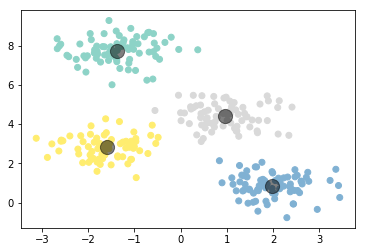

In [0]:
plt.scatter(blobs.iloc[:,0],blobs.iloc[:,1],c=blobs.iloc[:,3],cmap='Set3')
plt.scatter(blobgp2.iloc[:,0],blobgp2.iloc[:,1],c='black',s=200,alpha=0.5)

In [0]:
blobgp2=blobs.groupby(['blobgroupre'])['x','y'].mean()
blobgp2
blobs['blobgroupre']=assign(blobs.x,blobs.y)
blobs.head()

,x,y,blobgroup,blobgroupre,ds1,ds2,ds3,ds4
0,0.836857,2.136359,1,1,2.404840,1.512904,2.014791,2.192311
1,-1.413658,7.409623,3,0,3.353868,4.224130,3.724162,3.541201
2,1.155213,5.099619,0,2,1.734577,1.891442,1.459942,1.527132
3,-1.018616,7.814915,3,0,3.647213,4.482861,3.960396,3.797175
4,1.271351,1.892542,1,1,2.842583,1.945276,2.413003,2.606711


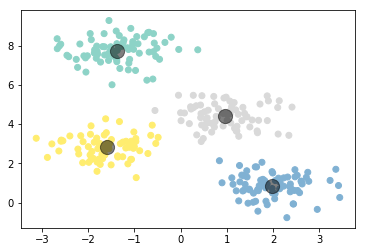

In [0]:
plt.scatter(blobs.iloc[:,0],blobs.iloc[:,1],c=blobs.iloc[:,3],cmap='Set3')
c2=plt.scatter(blobgp2.iloc[:,0],blobgp2.iloc[:,1],c='black',s=200,alpha=0.5)